<font size="+3" color=blue><b> <center><u> Cassava Leaf Disease - EDA & Fastai Baseline </u></center></b></font>

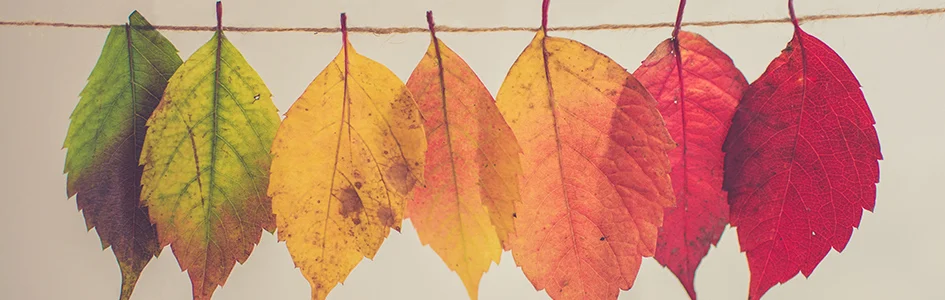

# Objective
Goal of this kernel is following:
- Learn how to implement FastAI on image data.
- Learn how to implement CNN on custom data.
- Learn how to Resnet to get better accuracy.
- Provide Perfect Guide for all the tips and trick to implement CNN and get better accuracy as a Begineer.

I have learned them from [FastAI](https://docs.fast.ai/)

<font size="+1" color=red ><b>Please Upvote my kernel and keep it in your favourite section if you think it is helpful.</b></font>

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Table of content</h3>

<font color="blue" size=+1><b>Introduction</b></font>
* [1. What is CNN ?](#2)
* [2. What is Transfer Learning ?](#3)    

<font color="blue" size=+1><b>Library</b></font>
* [1. Installation](#4)
* [2. Import Libraries ](#5)
    
<font color="blue" size=+1><b> Load and view your data </b></font>
* [1. Setting up path for training data ](#6)
* [2. Data Loading For training ](#7)
* [3. Data Explorations ](#8)
* [4. Print Classes present in the data ](#9)

<font color="blue" size=+1><b> Create and train a model </b></font>
* [1. Create Models ](#10)
* [2. Train Model ](#11)
* [3. Finding LR ](#12)
* [4. Finetuning HyperParameter](#13)

<font color="blue" size=+1><b> Others </b></font>
* [1. Interpret the results](#14)
* [2. Prediction Using Trained Model](#15)
* [3. Save and Load Model](#16)
* [4. Sources](#17)

<a id="1"></a>
<font color="blue" size=+2.5><b>Introduction</b></font>


<a id="2"></a>
<font color="blue" size=+2.5><b>1.2  What is CNN ?</b></font>
<br/>
<br/>
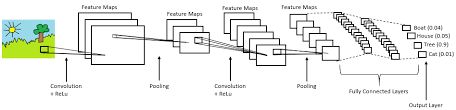
**CNN stands for Convolutional Neural Network which is a specialized neural network for processing data that has an input shape like a 2D matrix like images. CNN's are typically used for image detection and classification.**

<a id="3"></a>
<font color="blue" size=+2.5><b>1.3  What is Transfer Learning ?</b></font>
<br/>
<br/>
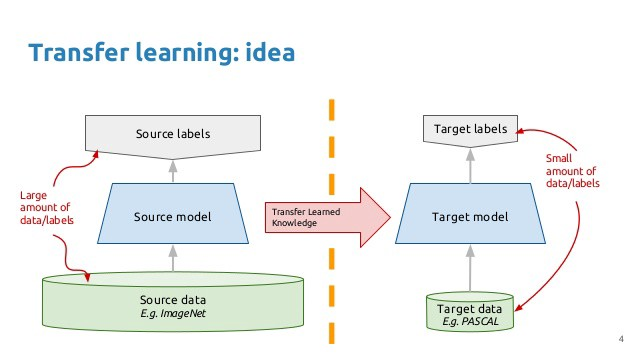
**Transfer learning is a machine learning technique where a model trained on one task is re-purposed on a second related task.**

<a id="5"></a>


<font color="blue" size=+2.5><b>2. Library</b></font>

<a id="4"></a>
<font color="blue" size=+2.5><b>2.1 Installation</b></font>
* Numpy
* Pandas
* Matplotlib
* Fastai

<a id="5"></a>
<font color="blue" size=+2.5><b>2.2 Library Import</b></font>

In [ ]:
import numpy as np
import os
import pandas as pd
from fastai.vision.all import *

<a id="6"></a>
<font color="blue" size=+2.5><b>3.1 Setting up path for training data</b></font>

**Point to be Noted: Number of elements in a list of path is same as number of classes you have**

In [ ]:
x  = '../input/cassava-leaf-disease-classification'
path = Path(x)
path.ls()

<a id="7"></a>
<font color="blue" size=+2.5><b>3.2 Data Loading For training</b></font>
<br/>

**Things to be remember:**
* Decide validation percentage ( 0.2 => 20% )
* Provide path for training data
* [Decide augmentations criteria (optional)](https://www.kaggle.com/init27/introduction-to-image-augmentation-using-fastai/)
* Decide image size (which is 224 in my case)
* Test data can also be added but it's optional

In [ ]:
train_df = pd.read_csv(path/'train.csv')
train_df['path'] = train_df['image_id'].map(lambda x:path/'train_images'/x)
train_df = train_df.drop(columns=['image_id'])
train_df = train_df.sample(frac=1).reset_index(drop=True)

In [ ]:
np.random.seed(40)
item_tfms = RandomResizedCrop(460, min_scale=0.75, ratio=(1.,1.))
batch_tfms = [*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]
data = ImageDataLoaders.from_df(train_df, 
                               valid_pct=0.2, 
                               seed=999, 
                               label_col=0, 
                               fn_col=1, 
                               bs=256, 
                               item_tfms=item_tfms, 
                               batch_tfms=batch_tfms)

<a id="8"></a>
<font color="blue" size=+2.5><b>3.3 Data Explorations</b></font>
<br/>

*Our image dataset is stored as .jpg files in 2 different folders, with each folder bearing the name of model of the images contained in the folder. We use the ImageDataBunch.from_folder() function to load the images and assign labels the images based on the name of the folder they’re read from.*

In [ ]:
data.show_batch(figsize=(7,6))


<a id="9"></a>
<font color="blue" size=+2.5><b>3.4 Print Classes present in the data</b></font>
<br/>

* data.c — How many classes are there in our dataset?
* len(data.train_ds) — What is the size of our training dataset?
* len(data.valid_ds) — What is the size of our validation dataset?

In [ ]:
data.c

In [ ]:
data

<a id="10"></a>
<font color="blue" size=+2.5><b>4.1 Create Model</b></font>
<br/>
* We now use a pre-trained ResNet50 Convolutional Neural Net model, and use transfer learning to learn weights of only the last layer of the network.
* Why Transfer learning? Because with transfer learning, you begin with an existing (trained) neural network used for image recognition — and then tweak it a bit (or more) here and there to train a model for your particular use case. And why do we do that? Training a reasonable neural network would mean needing approximately 300,000 image samples, and to achieve really good performance, we’re going to need at least a million images.
* In our case, we have approximately 4000+ images in our training set — you have one guess to decide if that would have been enough if were to train a neural net from scratch.
* We use the create_cnn() function for loading a pre-trained ResNet18 network, that was trained on around a million images from the ImageNet database.

In [ ]:
learn = cnn_learner(data, 
                    resnet50, 
                    loss_func = LabelSmoothingCrossEntropy(), 
                    metrics = [accuracy], 
                    cbs=MixUp()).to_native_fp16()


<a id="11"></a>
<font color="blue" size=+2.5><b>4.2 Finding LR</b></font>
<br/>

In [ ]:
learn.lr_find()


<a id="12"></a>
<font color="blue" size=+2.5><b>4.3 Train Model</b></font>
<br/>

In [ ]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(4,slice(lr1,lr2))

In [ ]:
# lr1 = 1e-3
lr = 1e-1
learn.fit_one_cycle(20,slice(lr))

<a id="13"></a>
<font color="blue" size=+2.5><b>4.4 Hyper Parameter Tuning</b></font>
<br/>

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.fit_one_cycle(10,slice(1e-4,1e-3))

<a id="14"></a>
<font color="blue" size=+2.5><b>5.1 Interpret the results</b></font>
<br/>

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

<a id="16"></a>
<font color="blue" size=+2.5><b>5.3 Save and Load Model</b></font>
<br/>


In [ ]:
learn.export(file = Path("/kaggle/working/export.pkl"))
learn.model_dir = "/kaggle/working"
learn.save("stage-1",return_path=True)

<a id="17"></a>
<font color="blue" size=+2.5><b>5.4 Sources</b></font>
<br/>
* [Fastai MOOC](https://course.fast.ai/)
* [Fastai library](https://docs.fast.ai/)

<a id="18"></a>
<font color="blue" size=+2.5><b>Feedback and Support</b></font>
<br/>
* Your feedback is much appreciated
* Please UPVOTE if you LIKE this notebook
* Comment if you have any doubts or you found any errors in the notebook